# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# !pip install --quiet shap==0.39.0
import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# Explainable AI

In [ ]:
shap.initjs()

In [ ]:
X_sample = X_train.sample(100)
X_sample

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute
13851,3,2,2,2,3,8,4,3,6,5,6,8,1,3,3,4,8,1,3,3,1,2,3,3,6,4,18,7
7137,5,4,2,5,3,6,4,3,8,5,6,2,1,1,4,3,9,2,1,5,4,3,6,4,6,13,8,1
11962,1,2,2,4,2,6,4,5,7,6,6,8,1,3,4,4,3,1,3,3,1,2,5,3,6,12,8,10
18426,1,2,2,2,2,1,3,5,8,4,6,1,1,1,4,3,2,1,1,3,1,2,2,3,6,11,18,10
11931,5,1,2,5,2,15,4,5,7,4,6,1,1,1,1,3,9,2,1,3,3,2,5,3,6,10,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18513,2,1,2,5,3,8,4,2,9,5,6,8,1,1,1,3,2,1,1,3,2,1,4,2,6,1,21,3
13415,1,2,2,5,1,1,1,3,3,5,6,2,1,1,4,3,2,2,1,2,1,1,1,3,6,12,17,3
4335,7,3,2,5,1,11,4,6,8,3,6,3,1,1,4,3,9,2,2,3,4,3,6,4,6,1,14,8
9352,5,1,2,5,1,9,4,6,9,4,6,2,1,1,1,3,9,1,2,3,4,3,6,4,6,3,23,6


In [ ]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

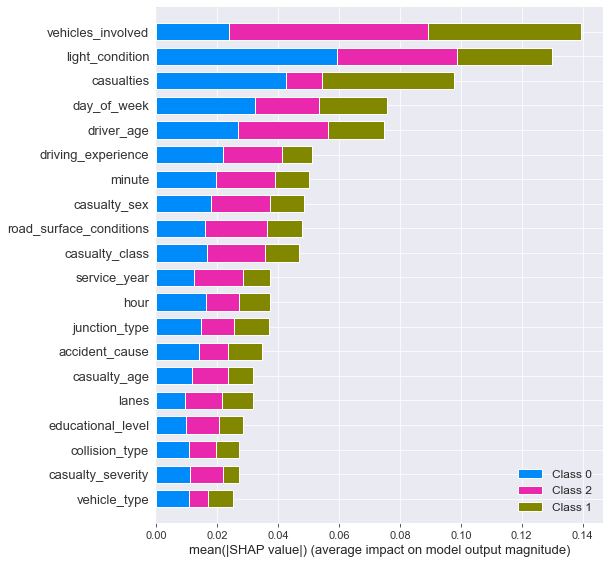

In [ ]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

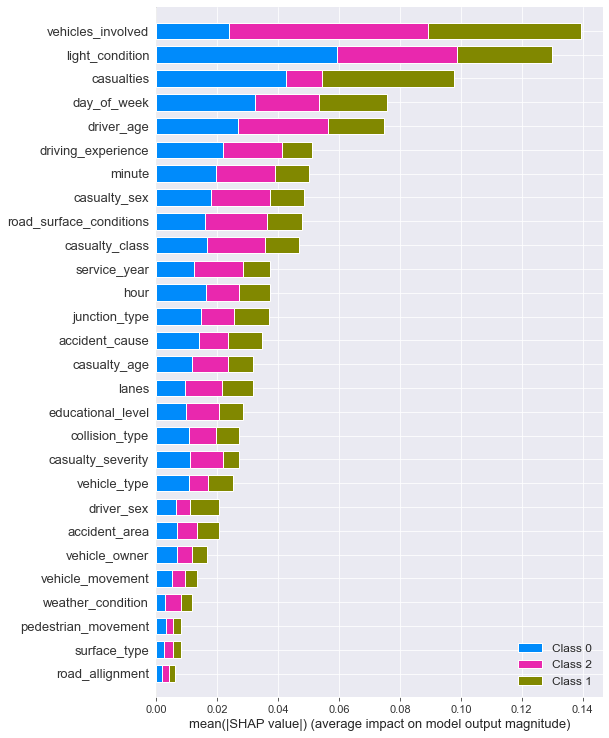

In [ ]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [ ]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [ ]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

3


In [ ]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

2


3


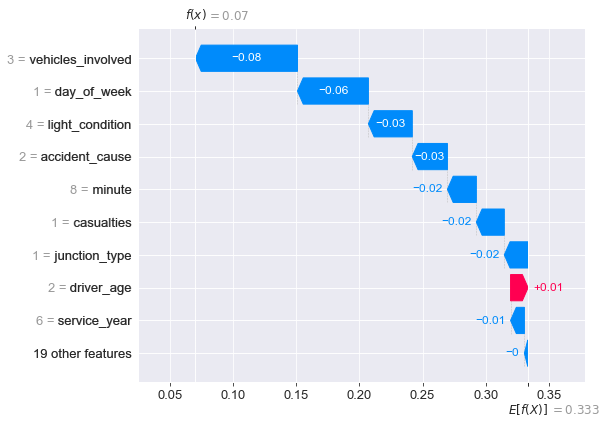

In [ ]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

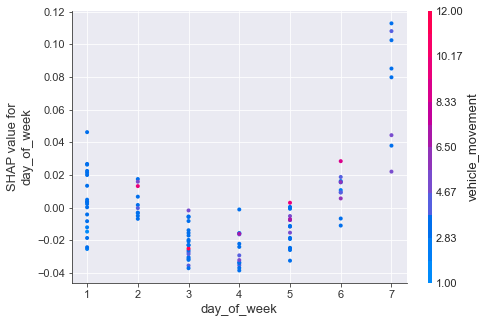

In [ ]:
shap.dependence_plot('day_of_week', shap_values[2], X_sample)

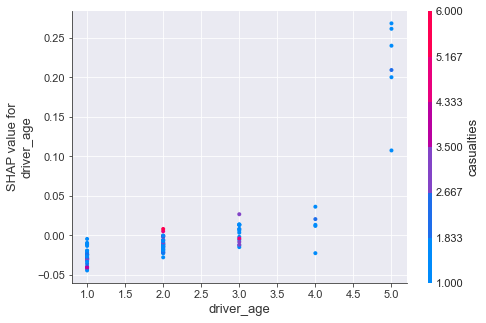

In [ ]:
shap.dependence_plot('driver_age', shap_values[2], X_sample)

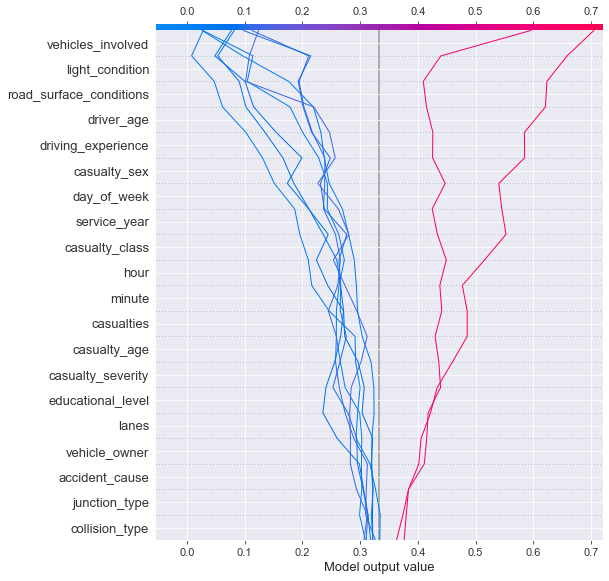

In [ ]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())